In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
path="../Dataset/literacy.xlsx"
data=pd.read_excel(path)

In [3]:
data

,Area Name,Religion,Number of literates,Division,Male Head,Female Head,1,2,3,4,5,6,7
0,INDIA,All Religious communities,Total,TOTAL,173131502,19987858,7645295,15926266,22534494,37090534,35930733,26187941,47804097
1,INDIA,All Religious communities,0,TOTAL,22603591,5197226,4312660,5578388,3823934,4178387,3542781,2503281,3861386
2,INDIA,All Religious communities,1,TOTAL,25222202,3793385,3332635,4938409,5113782,5109107,4189625,2721918,3610111
3,INDIA,All Religious communities,2,TOTAL,33076889,3519241,0,5409469,7810684,9117666,5935898,3676591,4645822
4,INDIA,All Religious communities,3,TOTAL,28507863,2990978,0,0,5786094,8544991,7142817,4374481,5650458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,3,URBAN,2,0,0,0,2,0,0,0,0
7772,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,4,URBAN,3,0,0,0,0,3,0,0,0
7773,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,5,URBAN,2,0,0,0,0,0,2,0,0
7774,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,6,URBAN,1,0,0,0,0,0,0,0,1


In [4]:
data = data[data['Number of literates'] != 'Total']

In [5]:
data

,Area Name,Religion,Number of literates,Division,Male Head,Female Head,1,2,3,4,5,6,7
1,INDIA,All Religious communities,0,TOTAL,22603591,5197226,4312660,5578388,3823934,4178387,3542781,2503281,3861386
2,INDIA,All Religious communities,1,TOTAL,25222202,3793385,3332635,4938409,5113782,5109107,4189625,2721918,3610111
3,INDIA,All Religious communities,2,TOTAL,33076889,3519241,0,5409469,7810684,9117666,5935898,3676591,4645822
4,INDIA,All Religious communities,3,TOTAL,28507863,2990978,0,0,5786094,8544991,7142817,4374481,5650458
5,INDIA,All Religious communities,4,TOTAL,27234951,2004098,0,0,0,10140383,7757183,4897417,6444066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,3,URBAN,2,0,0,0,2,0,0,0,0
7772,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,4,URBAN,3,0,0,0,0,3,0,0,0
7773,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,5,URBAN,2,0,0,0,0,0,2,0,0
7774,ANDAMAN & NICOBAR ISLANDS,Other Religious communities,6,URBAN,1,0,0,0,0,0,0,0,1


In [6]:
data['Number of literates'] = pd.to_numeric(data['Number of literates'], errors='coerce').fillna(0).astype(int)

C:\Users\varni\AppData\Local\Temp\ipykernel_310476\2488235771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Number of literates'] = pd.to_numeric(data['Number of literates'], errors='coerce').fillna(0).astype(int)


In [7]:
print(data['Number of literates'].unique())

[0 1 2 3 4 5 6 7]


In [8]:
# Calculate literacy rate
data['Total Heads'] = data['Male Head'] + data['Female Head']
data['Literacy Rate'] = data.apply(
    lambda row: (row['Number of literates'] / row['Total Heads'] * 100) if row['Total Heads'] != 0 else 0,
    axis=1
)

C:\Users\varni\AppData\Local\Temp\ipykernel_310476\181160337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Heads'] = data['Male Head'] + data['Female Head']
C:\Users\varni\AppData\Local\Temp\ipykernel_310476\181160337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Literacy Rate'] = data.apply(


In [9]:
data['Literacy Rate'].unique()

array([0.00000000e+00, 3.44642347e-06, 5.46505874e-06, ...,
       1.40056022e+00, 6.03448276e+00, 2.17391304e+01])

In [10]:
household_columns = [1, 2, 3, 4, 5, 6, 7]
data['Total Households'] = data[household_columns].sum(axis=1)
for col in household_columns:
    data[col] = (data[col] / data['Total Households']) * 100

# Drop unnecessary columns for simplicity
processed_data = data[['Area Name', 'Religion', 'Division', 'Literacy Rate', 'Male Head', 'Female Head'] + household_columns]

C:\Users\varni\AppData\Local\Temp\ipykernel_310476\368777718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Households'] = data[household_columns].sum(axis=1)
C:\Users\varni\AppData\Local\Temp\ipykernel_310476\368777718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] / data['Total Households']) * 100


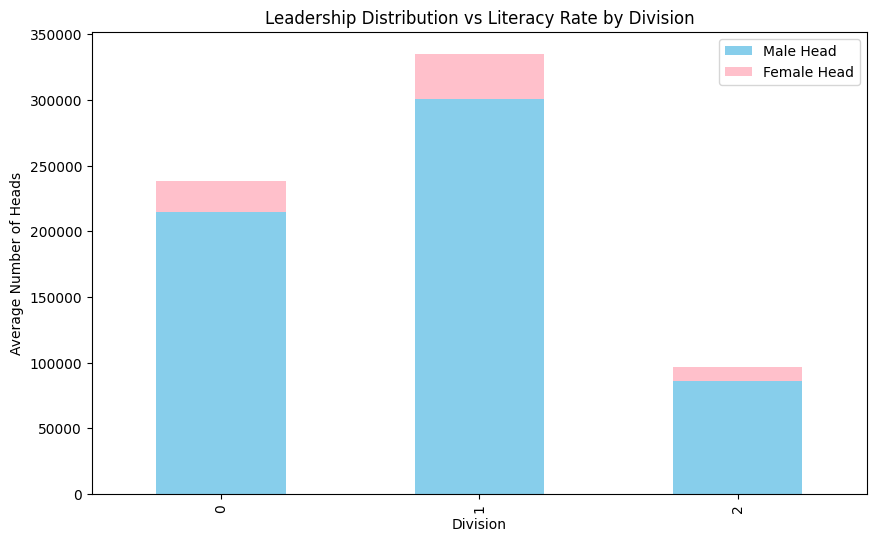

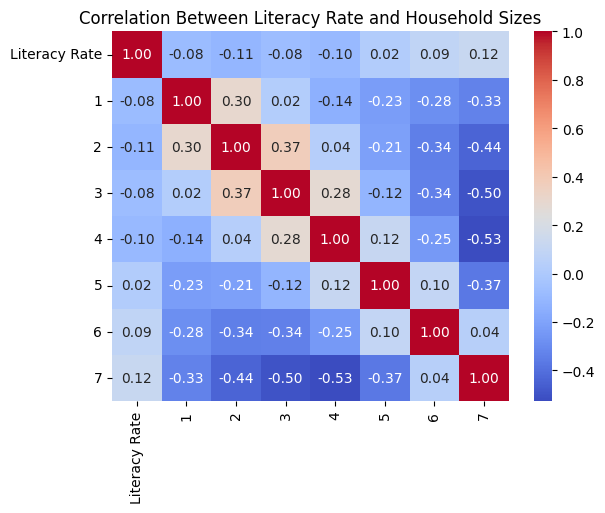

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns
numeric_columns = processed_data.select_dtypes(include=['number']).columns

# Perform groupby mean operation on numeric columns only
data_grouped = processed_data.groupby('Division')[numeric_columns].mean().reset_index()
data_grouped[['Male Head', 'Female Head']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'pink'])
plt.title("Leadership Distribution vs Literacy Rate by Division")
plt.xlabel("Division")
plt.ylabel("Average Number of Heads")
plt.legend(["Male Head", "Female Head"])
plt.show()

# Heatmap for correlation
correlation_matrix = processed_data[['Literacy Rate'] + household_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Literacy Rate and Household Sizes")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Encode categorical variables
le = LabelEncoder()
processed_data['Religion_Encoded'] = le.fit_transform(processed_data['Religion'])

# Prepare features and target
X = processed_data[['Literacy Rate', 'Religion_Encoded'] + household_columns]
y = (processed_data['Female Head'] > processed_data['Male Head']).astype(int)  # Female Headed = 1, else 0

# Train-test split
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1366
           1       0.00      0.00      0.00        17

    accuracy                           0.99      1383
   macro avg       0.49      0.50      0.50      1383
weighted avg       0.98      0.99      0.98      1383



C:\Users\varni\AppData\Local\Temp\ipykernel_310476\2201734154.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['Religion_Encoded'] = le.fit_transform(processed_data['Religion'])
c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Literacy Rate', 'Number of literates', 'Total Heads']])


c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\varni\miniconda3\envs\myenv\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\varni\miniconda3\envs\myenv\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\varni\miniconda3\envs\myenv\Lib\subprocess.py", line 1538

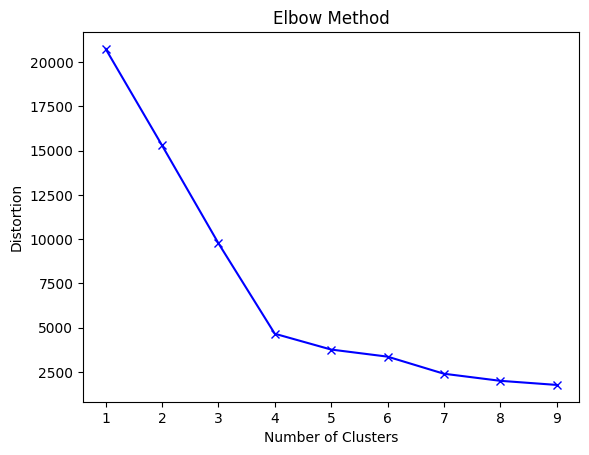

Clusters: 2, Silhouette Score: 0.7660834561521273
Clusters: 3, Silhouette Score: 0.7755276963581395
Clusters: 4, Silhouette Score: 0.5620302266417125
Clusters: 5, Silhouette Score: 0.5028615261735505
Clusters: 6, Silhouette Score: 0.4902569004348398
Clusters: 7, Silhouette Score: 0.5163481715542393
Clusters: 8, Silhouette Score: 0.5003026535063639
Clusters: 9, Silhouette Score: 0.4961083544270802
Best number of clusters: 3


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Silhouette score
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'Clusters: {k}, Silhouette Score: {score}')
    if score > best_score:
        best_score = score
        best_k = k
print(f'Best number of clusters: {best_k}')


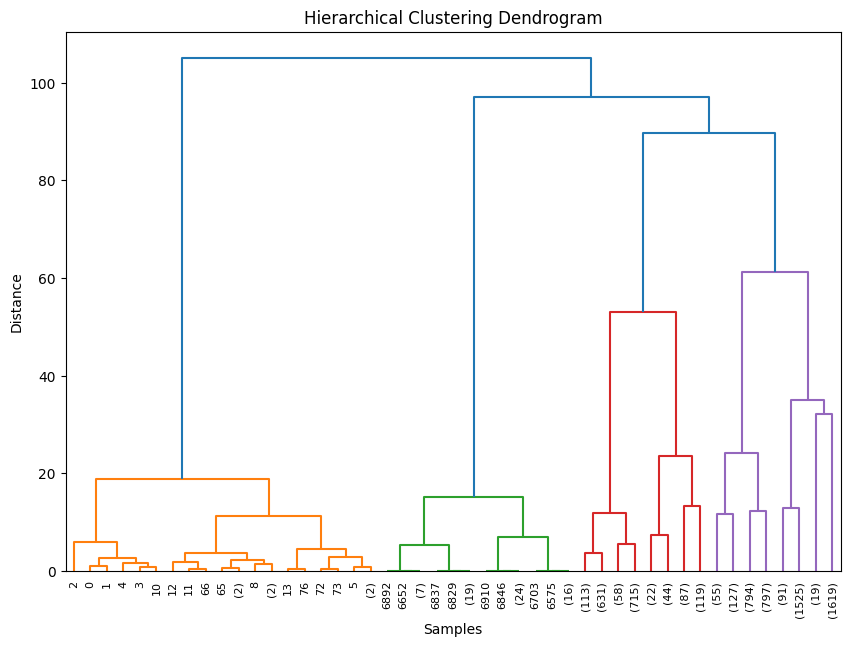

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix
linked = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\varni\AppData\Local\Temp\ipykernel_310476\1454883755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(scaled_data)


In [17]:
data['Cluster']

1       2
2       2
3       2
4       2
5       2
       ..
7771    0
7772    0
7773    1
7774    1
7775    0
Name: Cluster, Length: 6912, dtype: int32

In [18]:
data.to_csv('literacy_clustered.csv', index=False)

In [21]:
# Summing up the values across household size columns
household_size_columns = [1, 2, 3, 4, 5, 6, 7]
data['Total Household Size'] = data[household_size_columns].sum(axis=1)

# Optionally, calculate percentage of households in each category relative to the total
for col in household_size_columns:
    data[f'Percentage of {col}'] = data[col] / data['Total Household Size'] * 100

C:\Users\varni\AppData\Local\Temp\ipykernel_310476\2000076052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Household Size'] = data[household_size_columns].sum(axis=1)
C:\Users\varni\AppData\Local\Temp\ipykernel_310476\2000076052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Percentage of {col}'] = data[col] / data['Total Household Size'] * 100
C:\Users\varni\AppData\Local\Temp\ipykernel_310476\2000076052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [26]:
import plotly.express as px

# Aggregating household size columns by 'Division'
agg_data = data.groupby('Division')[household_size_columns].sum().reset_index()

# Now, 'agg_data' will have the sum of household size categories for each division.
# Create a new DataFrame that reshapes the data for radar chart
radar_data = agg_data.melt(id_vars='Division', value_vars=household_size_columns, 
                           var_name='Household Size', value_name='Number of Households')

# Now you can use this reshaped data to plot the radar chart
fig = px.line_polar(radar_data, r='Number of Households', theta='Household Size', color='Division', line_close=True)

# Customizing the chart
fig.update_layout(
    title="Radar Chart: Household Size Distribution by Division",
    polar=dict(
        radialaxis=dict(visible=True, range=[0, radar_data['Number of Households'].max()])
    )
)

fig.show()


In [65]:
!pip show nbformat


Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: https://jupyter.org
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior writte